# Examples of using Reservoir Class and conceptor_clustering( ) function

Generate a set of multivariate time series dataset (n_samples, n_timestamps, n_features) array. It combines 10 short time series with n_timestamps=100 and 10 long time series with n_timestamps=200

In [1]:
import numpy as np

X_short = np.random.randn(10,100,2)
tail_arr = np.zeros((10,100,2)) + np.NaN
X_short = np.concatenate((X_short,tail_arr),axis=1)
X_long = np.random.randn(10,200,2)
X = np.concatenate((X_short,X_long),axis=0)

build reservoir object

In [2]:
from ConceptorClustering import Reservoir
res = Reservoir(n_features=2)

build reservoir object (assign arguments by users)

In [3]:
from ConceptorClustering import Reservoir

res = Reservoir(n_features=2, 
                n_reservoir=100,
                spectral_radius=0.95, 
                connectivity=0.05,
                random_state=2)

convert these 20 multivariate time series into 20 Conceptors

In [4]:
X_C = res.transform_conceptor(X, alpha=1.)

show an example of Conceptor

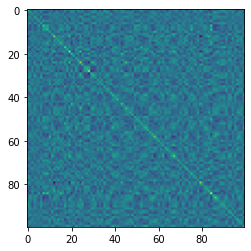

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(X_C[0])
plt.show()

Clustering the Conceptors (automatically choose number of clusters, corresponding to the max silhouette score)

In [6]:
from ConceptorClustering import conceptor_clustering

labels, silhouette_scores, affinity_matrix = conceptor_clustering(X_C)

Clustering the Conceptors (assign arguments by users)

In [7]:
from ConceptorClustering import conceptor_clustering

labels, silhouette_scores, affinity_matrix = conceptor_clustering(X_C, 
                                                  n_clusters=3,
                                                  n_components=3,
                                                  sigma=1.,
                                                  random_state=2)

# Examples of using ConceptorClustering Class

generate a set of multivariate time series dataset (n_samples, n_timestamps, n_features) array. It combines 10 short time series with n_timestamps=100 and 10 long time series with n_timestamps=200

In [8]:
import numpy as np
X_short = np.random.randn(10,100,2)
tail_arr = np.zeros((10,100,2)) + np.NaN
X_short = np.concatenate((X_short,tail_arr),axis=1)
X_long = np.random.randn(10,200,2)
X = np.concatenate((X_short,X_long),axis=0)

create ConceptorClustering object (automatically choose number of clusters, corresponding to the max silhouette score)

In [9]:
from ConceptorClustering import ConceptorClustering
conceptor_cluster = ConceptorClustering()

create ConceptorClustering object (assign arguments by users)

In [10]:
from ConceptorClustering import ConceptorClustering

conceptor_cluster = ConceptorClustering(n_clusters=3,
                                        n_reservoir=100, 
                                        spectral_radius=0.95, 
                                        connectivity=0.05, 
                                        sigma=1.,
                                        random_state=1)

use fit( ) function to obtain prediction labels, silhouette scores and affinity matrix

In [11]:
conceptor_cluster.fit(X)
print(conceptor_cluster.labels_)
print(conceptor_cluster.silhouette_scores_)
print(conceptor_cluster.affinity_matrix_)

[1 0 0 1 2 2 2 1 2 2 0 1 0 0 0 0 0 0 1 0]
{}
[[1.         0.97777884 0.97243912 0.98457543 0.9690476  0.9728087
  0.97748271 0.98293822 0.97523094 0.97237214 0.98245307 0.98302878
  0.98251188 0.98073247 0.98460241 0.9870528  0.98257485 0.98080563
  0.98489684 0.97972263]
 [0.97777884 1.         0.97788514 0.97663869 0.9767785  0.97144694
  0.97924276 0.97245382 0.98071266 0.96847317 0.9844095  0.97992706
  0.98111657 0.98300362 0.97832251 0.98868662 0.98104482 0.98186655
  0.98355806 0.98266818]
 [0.97243912 0.97788514 1.         0.97155891 0.97323631 0.97002159
  0.96594236 0.96049896 0.97201086 0.9700095  0.98255399 0.97840559
  0.98126803 0.98527042 0.98145014 0.98248885 0.97960597 0.98163265
  0.97837851 0.98472932]
 [0.98457543 0.97663869 0.97155891 1.         0.97270862 0.96380131
  0.97931218 0.98223712 0.97377459 0.97293698 0.98080689 0.9855401
  0.98353608 0.98101108 0.98168332 0.98679082 0.9836659  0.9811591
  0.98338071 0.97730396]
 [0.9690476  0.9767785  0.97323631 0.97270

use fit_predict( ) function to obtain prediction_labels

In [12]:
labels = conceptor_cluster.fit_predict(X)
print(labels)

[1 0 0 1 2 2 2 1 2 2 0 1 0 0 0 0 0 0 1 0]
